<a href="https://colab.research.google.com/github/crazy85128x/ML0930/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from tensorflow.keras.datasets.mnist import load_data
#((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [61]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,95,178,254,169,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,227,254,254,254,244,57,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,3,227,254,254,254,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,67,254,254,254,211,212,254,166,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,17,233,254,159,15,114,254,197,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,37,140,103,16,0,114,254,197,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,254,197,0,0,0,0,0,0,0


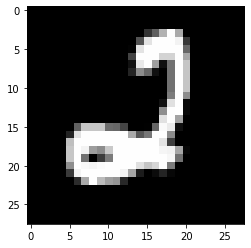

In [62]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import random
import matplotlib.pyplot as plt
import pandas as pd
idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap="gray")
pd.DataFrame(x_train[idx])

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [54]:
# 處裡圖片
# x: scaling 0-255 -> 0-1 框架(tf)隨機係數的關係
# y: one-hot encoding 十個答案
from tensorflow.keras.utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0], y_train_cat[0])
x_train_norm[0]

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
# 一個神經元: binary crossentropy p log 1/q + (1-p) log 1/(1-q)
# 多個神經元: categorical crossentropy p1 log 1/q1 +.....
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=["accuracy"])

In [56]:
# batch: 100`200(小圖片) 10`20(大圖片)
# epoch: 整份資料要看幾遍
# 60000筆, 2epoch, 200batch -> 60000 * 2 / 200次調整
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("/content/drive/My Drive/Colab Notebooks/model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train_cat,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
540/540 - 4s - loss: 0.3083 - accuracy: 0.9139 - val_loss: 0.1434 - val_accuracy: 0.9602
Epoch 2/50
540/540 - 2s - loss: 0.1349 - accuracy: 0.9610 - val_loss: 0.0949 - val_accuracy: 0.9733
Epoch 3/50
540/540 - 2s - loss: 0.0922 - accuracy: 0.9731 - val_loss: 0.0861 - val_accuracy: 0.9745
Epoch 4/50
540/540 - 2s - loss: 0.0667 - accuracy: 0.9808 - val_loss: 0.0736 - val_accuracy: 0.9793
Epoch 5/50
540/540 - 2s - loss: 0.0509 - accuracy: 0.9849 - val_loss: 0.0715 - val_accuracy: 0.9790
Epoch 6/50
540/540 - 2s - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0714 - val_accuracy: 0.9803
Epoch 7/50
540/540 - 2s - loss: 0.0311 - accuracy: 0.9910 - val_loss: 0.0694 - val_accuracy: 0.9805
Epoch 8/50
540/540 - 2s - loss: 0.0237 - accuracy: 0.9940 - val_loss: 0.0700 - val_accuracy: 0.9813
Epoch 9/50
540/540 - 2s - loss: 0.0196 - accuracy: 0.9949 - val_loss: 0.0716 - val_accuracy: 0.9803
Epoch 10/50
540/540 - 2s - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0699 - val_accuracy: 0.9810

In [57]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0694 - accuracy: 0.9792


[0.06938380748033524, 0.979200005531311]

In [58]:
# 手動儲存: model.save("model.h5")
from tensorflow.keras.models import load_model
load = load_model("/content/drive/My Drive/Colab Notebooks/model.h5")
# 不用再compile, 可以直接繼續fit
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9792


[0.06938380748033524, 0.979200005531311]

In [59]:
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      index=["{}(原本)".format(n) for n in range(10)],
      columns=["{}(預測)".format(n) for n in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),969,0,2,1,1,2,2,1,2,0
1(原本),0,1123,2,1,0,1,2,2,4,0
2(原本),5,1,1004,0,3,0,2,9,8,0
3(原本),1,0,8,974,0,11,0,6,5,5
4(原本),1,0,2,1,969,0,2,1,1,5
5(原本),3,0,0,3,1,876,4,1,4,0
6(原本),5,3,1,1,8,3,933,0,4,0
7(原本),0,3,8,1,0,0,0,1012,2,2
8(原本),5,0,3,1,5,5,0,2,949,4
9(原本),2,2,0,1,10,3,0,5,3,983


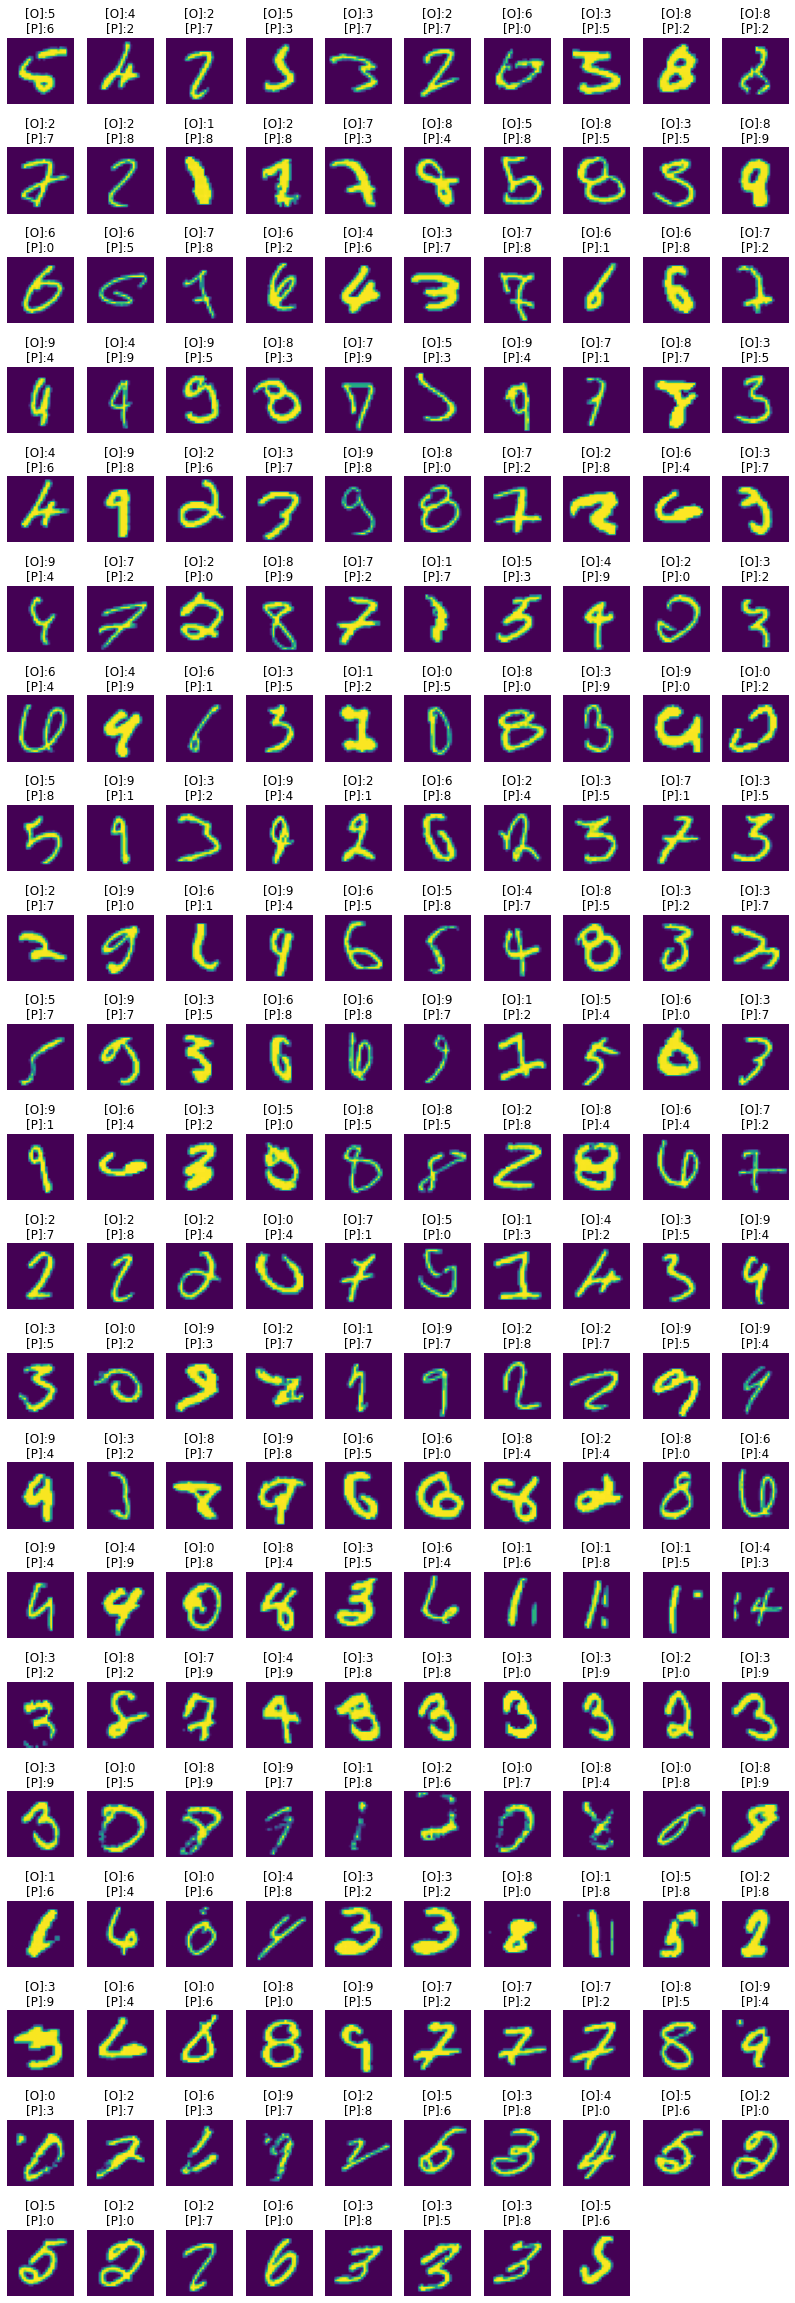

In [67]:
# subplot(總高度,  總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
hright = len(false_img) // width + 1

for i in range(len(false_img)):
  plt.subplot(hright, width, i+1)
  title = "[O]:{}\n[P]:{}".format(false_label[i], false_pre[i])
  plt.title(title)
  plt.axis("off")
  plt.imshow(false_img[i])